In [1]:
import sys
sys.path.append(r"../../utils")

import numpy as np 
import pandas as pd

from questions_columns import sci_af_ca, c_ssrs, sci_mother, scs_clin, siq, sdq,c_ssrs_intake, mfq, scared, ATHENS, SAS, c_ssrs_clin, demographics_m, target_variables, imputation_questionnaires, all_target_columns
from questions_columns import suicidal_behavior_time2, suicidal_ideation_time2

import pandas_profiling as pp

from utils import simple_eda, impute_from_column
from questionnaires_aggregation import c_ssrs_aggregation, c_ssrs_intake_aggregation, sci_af_ac_aggregation, sdq_aggregatoin

c_ssrs = c_ssrs[:-2]
chameleon = ['chameleon_behavior_stu', 'chameleon_attempt_stu', 'chameleon_suicide_er_stu', 'chameleon_ideation_stu']

In [2]:
info_columns = ['id', 'gender', 'redcap_event_name', 'age_child_pre']
all_columns_processing = set(info_columns + demographics_m + sci_af_ca + siq + sdq + c_ssrs_intake + c_ssrs + mfq + scared + ATHENS + SAS + scs_clin + sci_mother + c_ssrs_clin + chameleon)
all_columns_ordered = info_columns + demographics_m + c_ssrs_intake + c_ssrs + c_ssrs_clin + sci_af_ca + scs_clin + sci_mother + siq + sdq + mfq + scared + ATHENS + SAS + demographics_m + all_target_columns
id_column = 'id'
df = pd.read_csv(r'../../creating_the_clinic_dataset/preprocessed_data/merged_2021_and_2022.csv', na_values = ' ')

C:\Users\nogur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,44,50,73,84,309,437,442,443,450,457,486,502,540,549,568,728,733,745,747,752,763,801,810,829,882,883,884,885,886,887,888,889,890,891,892,951,989,994,1000,1015,1045,1065,1066,1070,1071,1072,1073,1075,1076,1077,1080,1081,1098,1103,1119,1121,1172,1174,1193,1195,1196,1197,1203,1204,1205,1206,1358,1360,1361,1362,1368,1369,1370,1371,1486,1492,1493,1496,1497,1498,1499,1508,1516,1532,1535,1546) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
for questionnaire in imputation_questionnaires['father_2_mother']:
    
    p_columns = [i[:-1] for i in questionnaire]
    
    for column_name in p_columns:
        df = impute_from_column(df, impute_to = f"{column_name}m", impute_from = f'{column_name}f')


In [4]:
for questionnaire in imputation_questionnaires['stu_2_clin']:
    
    staff_columns = [i[:-4] for i in questionnaire]
    
    for column_name in staff_columns:
        try:
            df = impute_from_column(df, impute_to = f"{column_name}clin", impute_from = f'{column_name}stu')
        except KeyError:
            pass
            

In [5]:
df_intake = df[df.redcap_event_name == 'intake_arm_1'][all_columns_processing]
df_5weeks = df[df.redcap_event_name == 'control_5weeks_arm_1'][all_columns_processing]
df_pre = df[df.redcap_event_name == 'pre_treatment_arm_1'][all_columns_processing]
df_3months = df[df.redcap_event_name == 'followup_3month_arm_1'][all_columns_processing]

In [6]:
all_columns_ordered.remove('id')
all_columns_processing.remove('id')

df_pre_5weeks = pd.merge(df_5weeks, df_pre, on=['id'], how='outer', suffixes=('', '_treatment_arm_1'))

for column_name in all_columns_processing:
    df_pre_5weeks = impute_from_column(df_pre_5weeks, impute_to = column_name, impute_from = f'{column_name}_treatment_arm_1')

    
    
five_weeks_cols = [i for i in df_pre_5weeks.columns if i.endswith('_treatment_arm_1')]
df_pre_5weeks = df_pre_5weeks.drop(five_weeks_cols, axis=1)

In [7]:
df_time2 = pd.merge(df_pre_5weeks, df_3months, on=['id'], how='outer', suffixes=('', '_followup_3month_arm_1'))


for column_name in all_columns_processing:
    df_time2 = impute_from_column(df_time2, impute_to = column_name, impute_from = f'{column_name}_followup_3month_arm_1')

    
    
followup_3month_cols = [i for i in df_time2.columns if i.endswith('_followup_3month_arm_1')]
df_time2 = df_time2.drop(followup_3month_cols, axis=1)

In [8]:
df_intake['measurement'] = 'time1'
df_time2['measurement'] = 'time2'

C:\Users\nogur\AppData\Local\Temp/ipykernel_16532/97543714.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_time2[questionnaire_name] = (tmp.sum(axis=1) > 0).astype(int)
C:\Users\nogur\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\nogur\anaconda3\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Matrix missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Matrix": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'gr

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\nogur\AppData\Local\Temp/ipykernel_16532/97543714.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_time2[questionnaire_name] = (tmp.sum(axis=1) > 0).astype(int)
C:\Users\nogur\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\nogur\anaconda3\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Matrix missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Matrix": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'gr

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

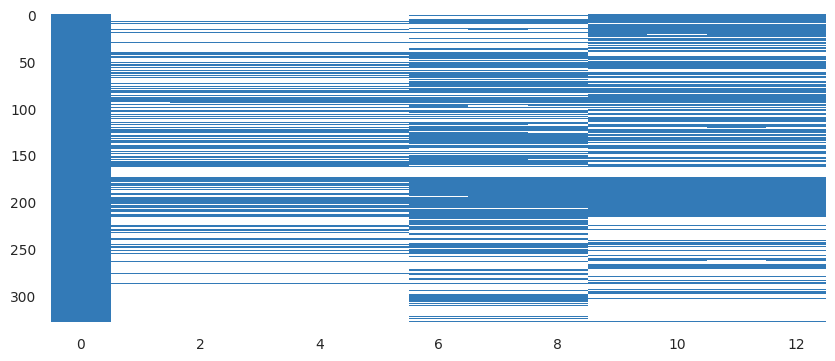

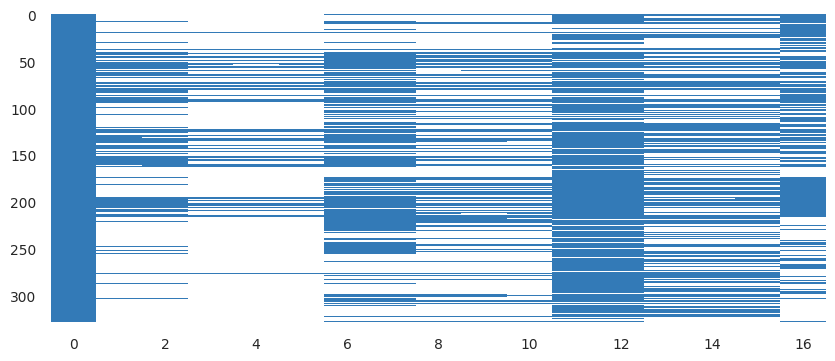

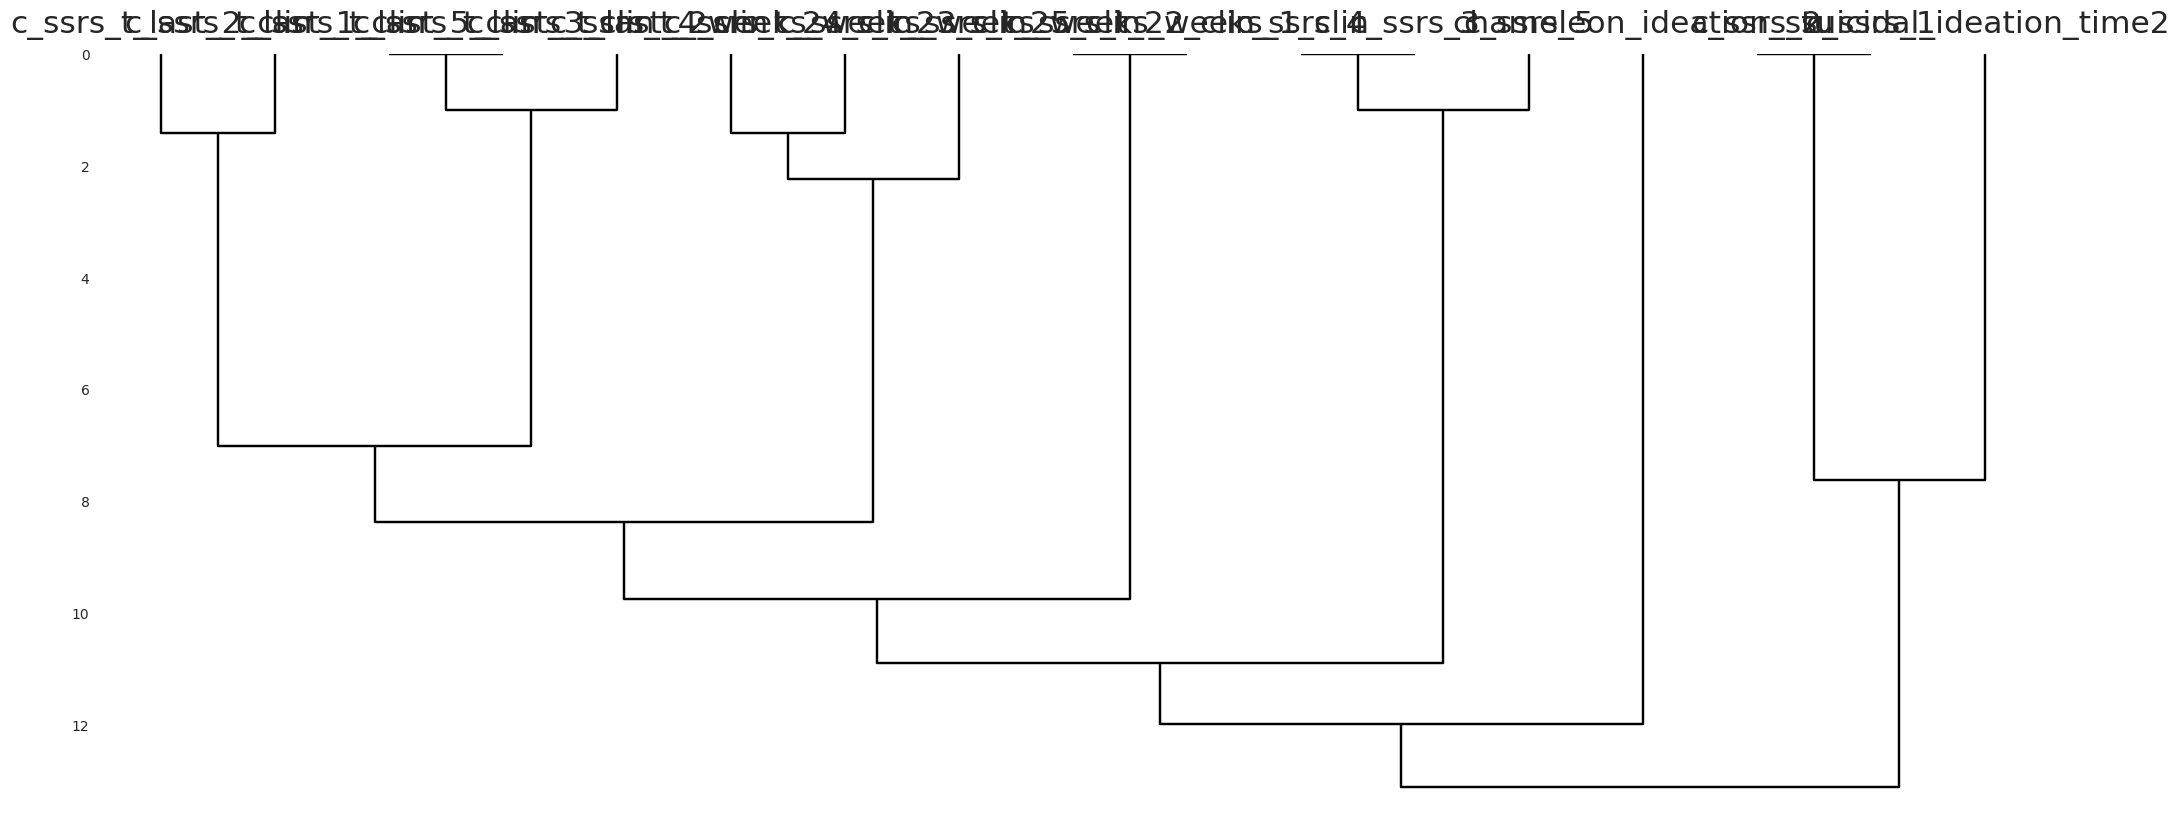

In [9]:
for questionnaire_name, items in target_variables['intake'].items():

    tmp = df_intake[items].replace(2, 0)
    df_intake[questionnaire_name] = (tmp.sum(axis=1) > 0).astype(int)
    
    
for questionnaire_name, items in target_variables['time2'].items():

    tmp = df_time2[items].replace(2, 0)
    df_time2[questionnaire_name] = (tmp.sum(axis=1) > 0).astype(int)
    if (questionnaire_name == 'suicidal_behavior_time2') or (questionnaire_name == 'suicidal_ideation_time2'):
        to_profile = df_time2[[questionnaire_name]+items]
        profile = pp.ProfileReport(to_profile)
        profile.to_file(fr"{questionnaire_name}.html")
        
   

In [10]:
output_df = pd.concat([df_intake, df_time2])
output_df = output_df[['id', 'measurement'] + all_columns_ordered]

output_df = impute_from_column(output_df, impute_to = 'c_ssrs_6', impute_from = 'c_ssrs_last_visit_6')
output_df.loc[output_df[~ output_df[c_ssrs].isna().all(axis=1)].index, c_ssrs] = 0


In [11]:
missing_sci_af_ca = [f'sci_af_ca_{i}' for i in range(26,41)]
output_df, _ = sci_af_ac_aggregation(output_df)

output_df['is_sci_af_ca_missing'] = output_df[missing_sci_af_ca].isna().all(axis=1)


output_df['mfq_sum'] = output_df[mfq].sum(axis=1, skipna=False)

for time in ['life', '2weeks', 'recent']:
    for severity in ['stb', 'idea']:
        agg_column = f'c_ssrs_intake_{time}_{severity}'
        output_df[agg_column] = c_ssrs_intake_aggregation(output_df, severity = severity, time = time)
        
        
output_df['siq_sum'] = output_df[siq].sum(axis=1, skipna=False)

output_df = sdq_aggregation(output_df)


In [12]:
output_df.to_csv("data_for_prediction_task - measurement time axis.csv", index=False)

In [13]:

df_intake = output_df[output_df.measurement == 'time1']
df_target = output_df[output_df.measurement == 'time2']


merged_times = pd.merge(df_intake, df_target, on='id', how='outer', suffixes=('_time1', '_time2'))
merged_times = merged_times.drop(['measurement_time1', 'measurement_time2'], axis=1)

merged_times.to_csv("data_for_prediction_task- single_patient_axis.csv", index=False)

In [15]:
eda = False
if eda:
    simple_eda(merged_times, columns = list(merged_times.columns), title = 'generic_data_for_prediction_task', display_additional_columns=False)